## 1 Lab work
## Numerical methods in statistics
Bieliukina Tetiana

The purpose of the work: to analyze the dataset "mammals", to build a regression model

First, let's read the MASS library and the "mammals" dataset necessary for work:

In [15]:
library(MASS)

In [16]:
data(mammals)
mammals

,body,brain
,<dbl>,<dbl>
Arctic fox,3.385,44.50
Owl monkey,0.480,15.50
Mountain beaver,1.350,8.10
Cow,465.000,423.00
Grey wolf,36.330,119.50
Goat,27.660,115.00
Roe deer,14.830,98.20
Guinea pig,1.040,5.50
Verbet,4.190,58.00


This dataset records the body and brain weight of a specific mammal. Let's try to determine whether there is a relationship between these variables, and if so, build a regression model. We can notice that the variables brain and body are written in different formats, body - in kilograms, and brain - in grams. Let's fix this:

In [17]:
mammals$brain <- mammals$brain / 1000

Now both variables are written in kilograms.

Let's try to visualize our data to see what we are dealing with.

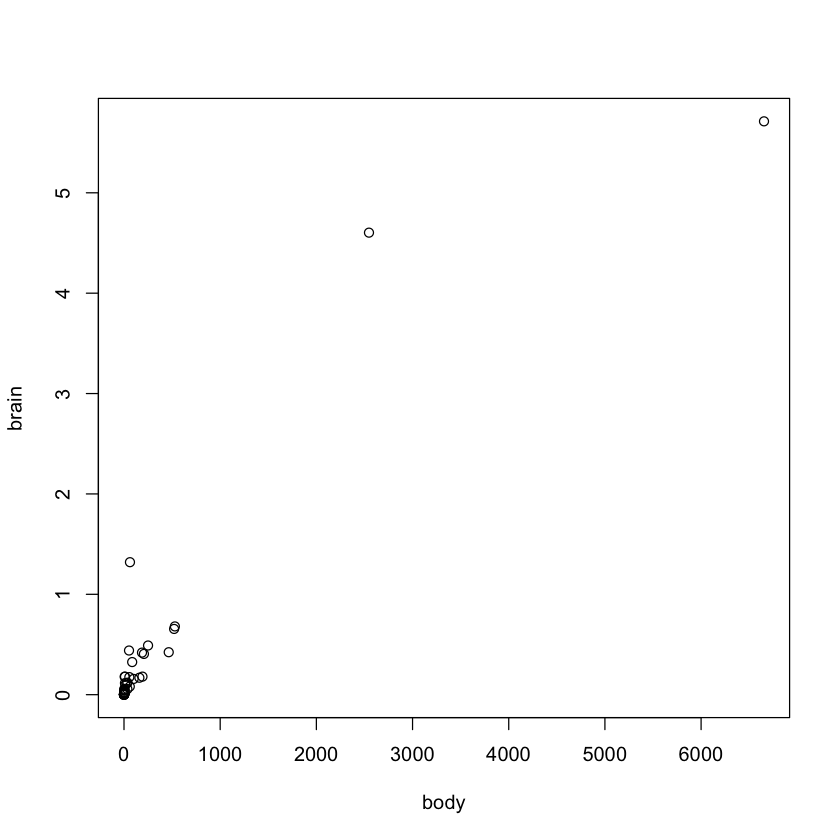

In [18]:
plot(mammals)

On the scatter plot, we can see the points that we want to classify as outliers. Because of these outliers, we can't see very clearly whether there is a linear relationship between those points gathered together in the lower left corner.

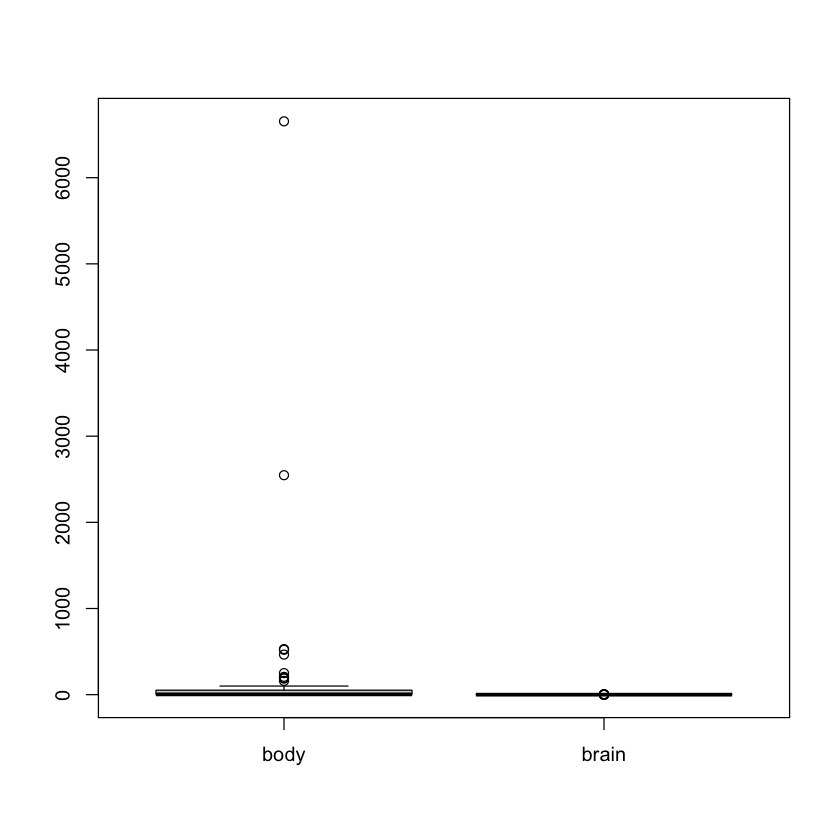

In [19]:
boxplot(mammals)

We could throw out these points that exceed 1.5 of the interquartile range, but we can clearly see that these points are not some technical error, but simply the weight of large animals. Let's logarithmize the data.

In [20]:
mammals$body <- log(mammals$body)
mammals$brain <- log(mammals$brain)

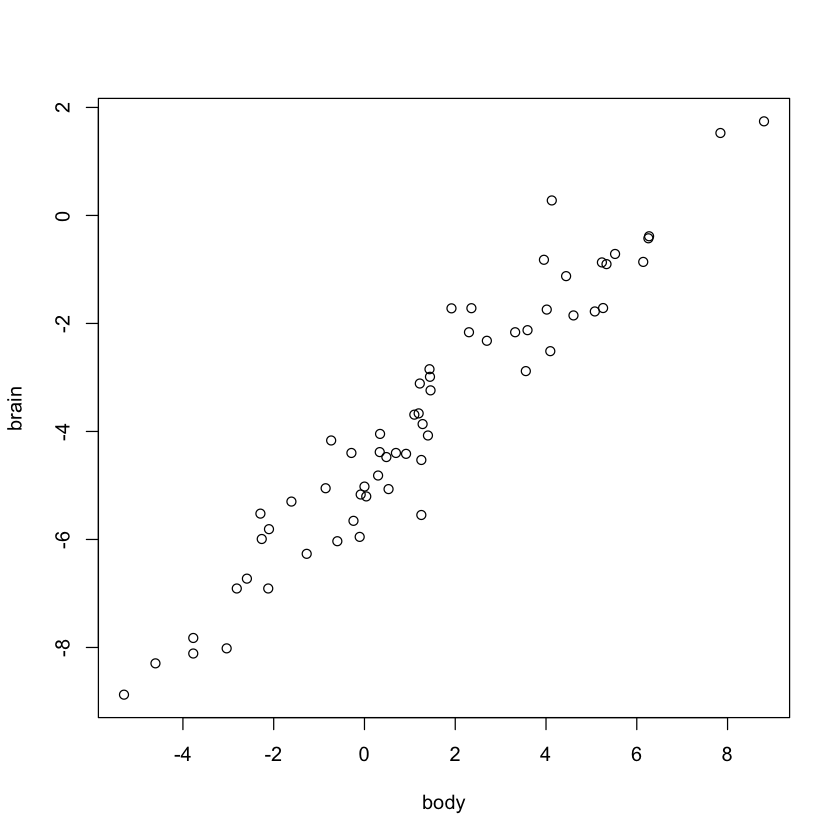

In [21]:
plot(mammals)

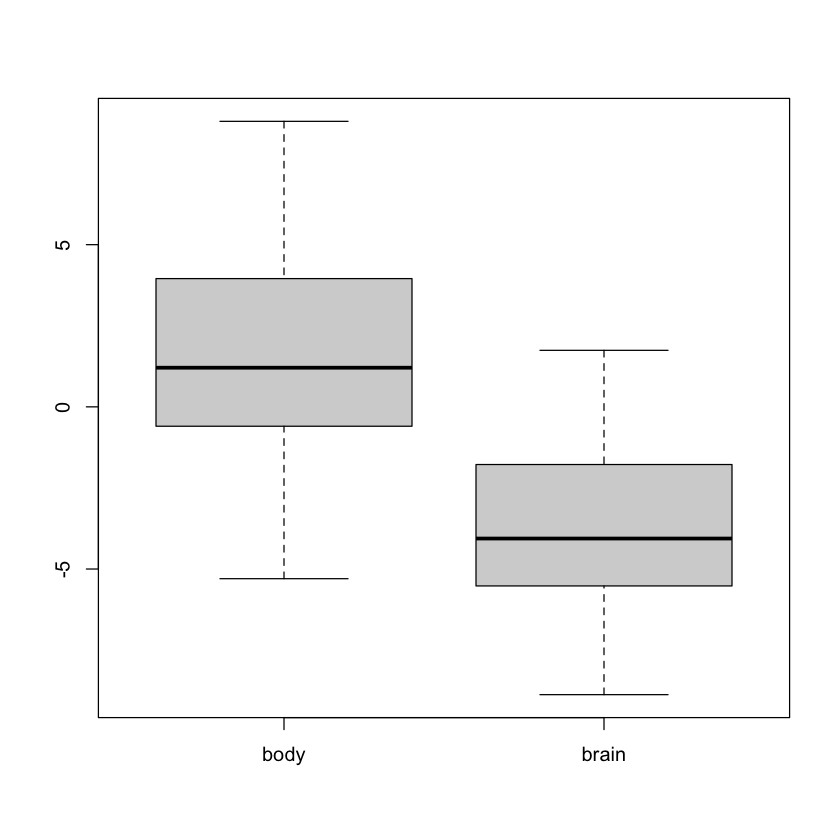

In [22]:
boxplot(mammals)

We see that logarithmization really helped us a lot. We got rid of outliers, and on the scatter plot we can see a linear relationship between body weight and brain weight. We can also check the linearity using the correlation tool:

In [23]:
cor(mammals$body, mammals$brain)

[1] 0.9595748

The correlation is very high - there is a linear relationship

Let's also see if our variables are normally distributed:

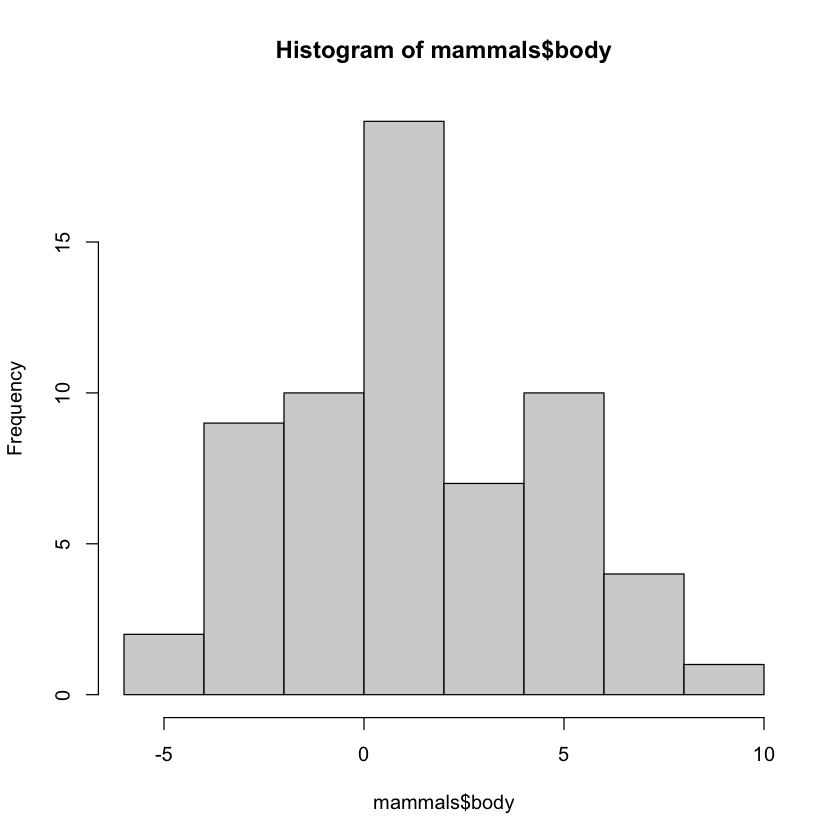

In [24]:
hist(mammals$body)

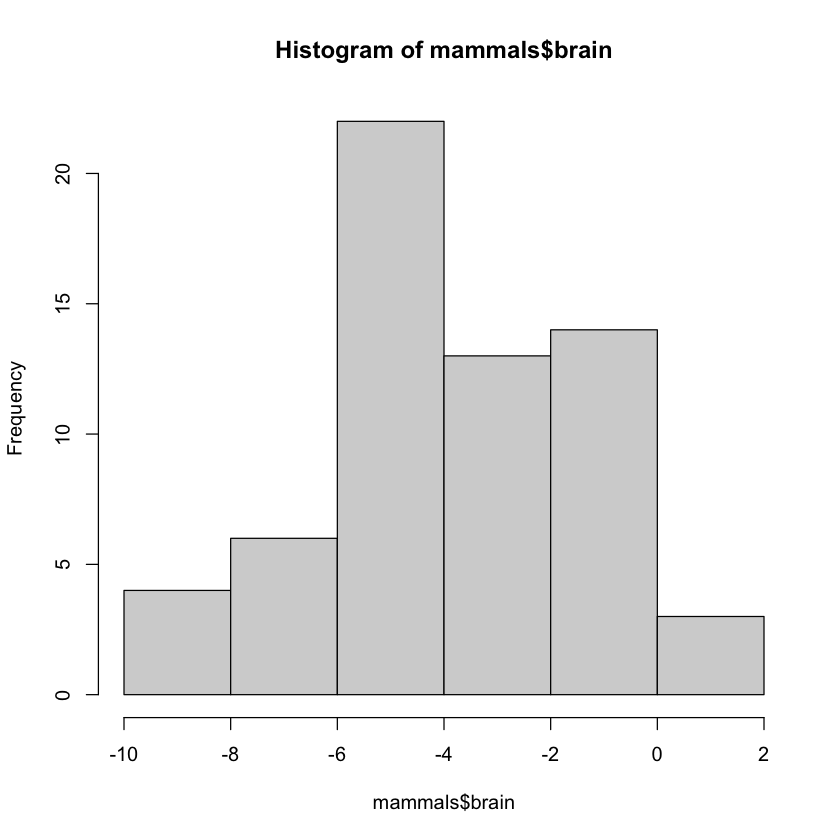

In [25]:
hist(mammals$brain)

It seems that the variables are normally distributed. We can also test normality using the Shapiro-Wilk test, where the hypothesis H0 is that the variable is normally distributed:

In [26]:
shapiro.test(mammals$body)


	Shapiro-Wilk normality test

data:  mammals$body
W = 0.98645, p-value = 0.7272


In [27]:
shapiro.test(mammals$brain)


	Shapiro-Wilk normality test

data:  mammals$brain
W = 0.98589, p-value = 0.697


For the variable body - p-value=0.7272 > 0.05, so we accept the hypothesis H0, similarly the hypothesis H0 is accepted for the variable brain.

So, we saw that our variables have a linear relationship, the variables are normally distributed, we got rid of outliers by logarithming. We can start building the linear model.

Let's divide the input dataset into train and test. 70% of the entries will be for model training. 30% - for testing

In [28]:
library(caTools)

#use 70% of dataset as training set and 30% as test set
sample <- sample.split(mammals$brain, SplitRatio = 0.7)
train  <- subset(mammals, sample == TRUE)
test   <- subset(mammals, sample == FALSE)

In [29]:
model <- lm(brain ~ body, data = mammals)
summary(model)


Call:
lm(formula = brain ~ body, data = mammals)

Residuals:
     Min       1Q   Median       3Q      Max 
-1.71550 -0.49228 -0.06162  0.43597  1.94829 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) -4.77297    0.09604  -49.70   <2e-16 ***
body         0.75169    0.02846   26.41   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.6943 on 60 degrees of freedom
Multiple R-squared:  0.9208,	Adjusted R-squared:  0.9195 
F-statistic: 697.4 on 1 and 60 DF,  p-value: < 2.2e-16


At first glance, the model looks good, p-value is close to zero, Multiple R-squared and Adjusted R-squared are large.

Let's also analyze our residuals:

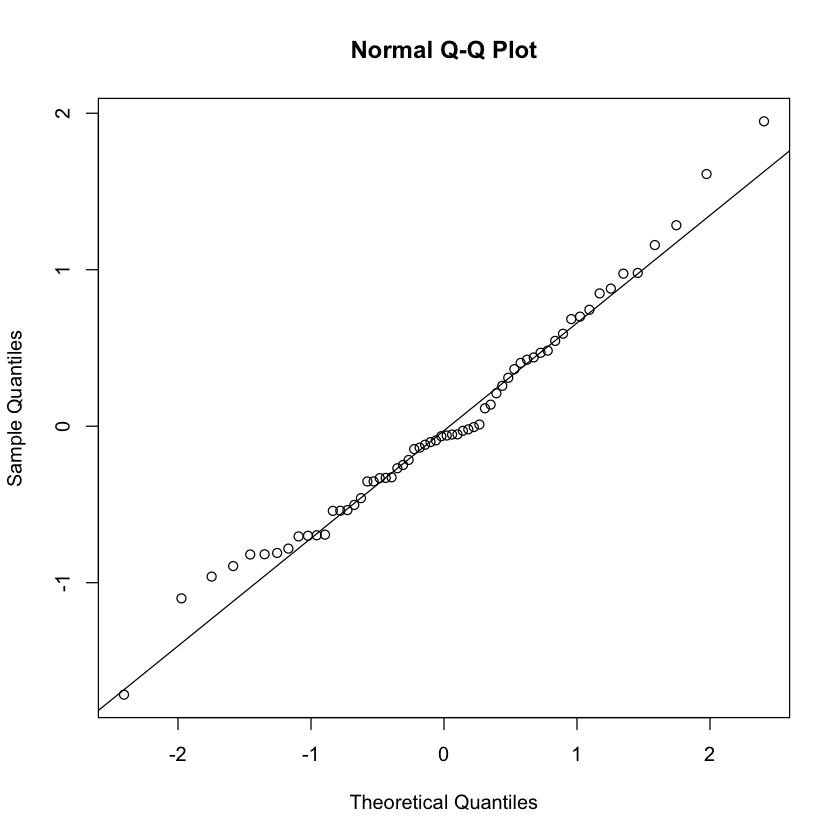

In [30]:
#Q-Q Plot
qqnorm(model$resid)
qqline(model$resid)

Здається що залишки розподілені нормально, але все ж таки трохи важео оцінити по QQ-плоту. Можемо провести тест Шапіро-Вілка на нормальність:

In [31]:
shapiro.test(model$resid)


	Shapiro-Wilk normality test

data:  model$resid
W = 0.98268, p-value = 0.5293


We obtained a p-value > 0.05, we accept the null hypothesis that the residuals are normally distributed.
Also, to check the "adequacy" of the model, we can use the built-in R function - gvlma:

In [24]:
library(gvlma)
gvlma(model)


Call:
lm(formula = brain ~ body, data = mammals)

Coefficients:
(Intercept)         body  
    -2.4704       0.7517  


ASSESSMENT OF THE LINEAR MODEL ASSUMPTIONS
USING THE GLOBAL TEST ON 4 DEGREES-OF-FREEDOM:
Level of Significance =  0.05 

Call:
 gvlma(x = model) 

                    Value p-value                Decision
Global Stat        3.3711  0.4977 Assumptions acceptable.
Skewness           1.6989  0.1924 Assumptions acceptable.
Kurtosis           0.2340  0.6286 Assumptions acceptable.
Link Function      0.9504  0.3296 Assumptions acceptable.
Heteroscedasticity 0.4879  0.4848 Assumptions acceptable.

1. Global Stat - there is a linear relationship between the independent and dependent variables
2. Skewness - the date is not shifted
3. Kurtosis - lack of kurtosis (very high or low peak)
4. Link Function - a continuous variable
5. Heteroscedasticity – independence of the variance of random components from the observation number

All checks passed

Let's now look at the results for the test part. Let's draw a graph of the deviations of the real values from the predicted ones, as well as a graph of the real and predicted values on one graph:

In [32]:
U <- test[2] - predict(model, test[1])

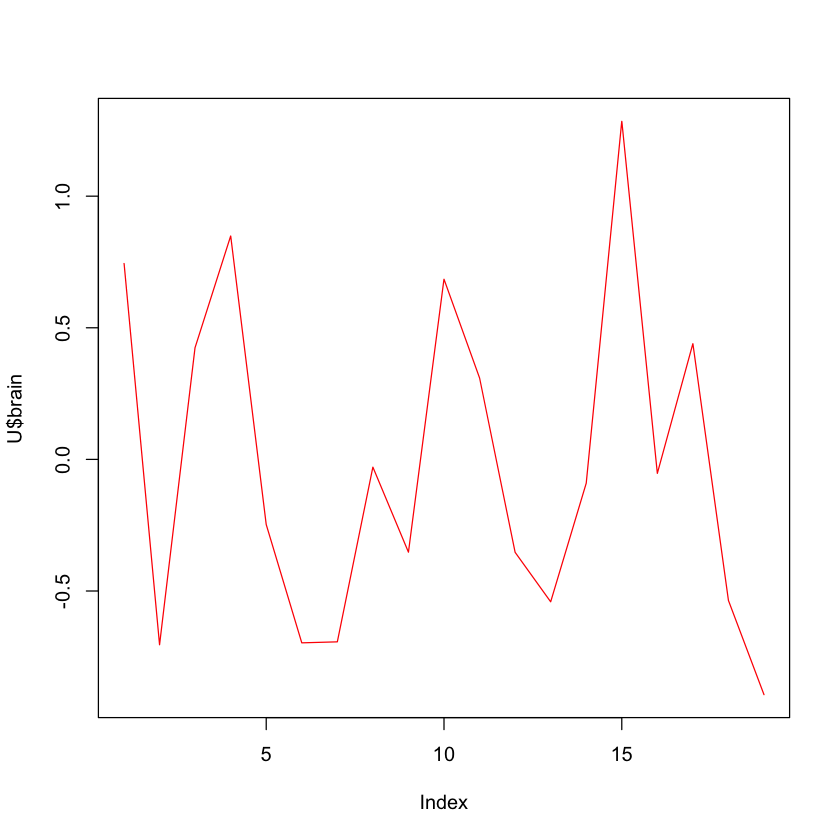

In [33]:
plot(U$brain,type="l",col="red")


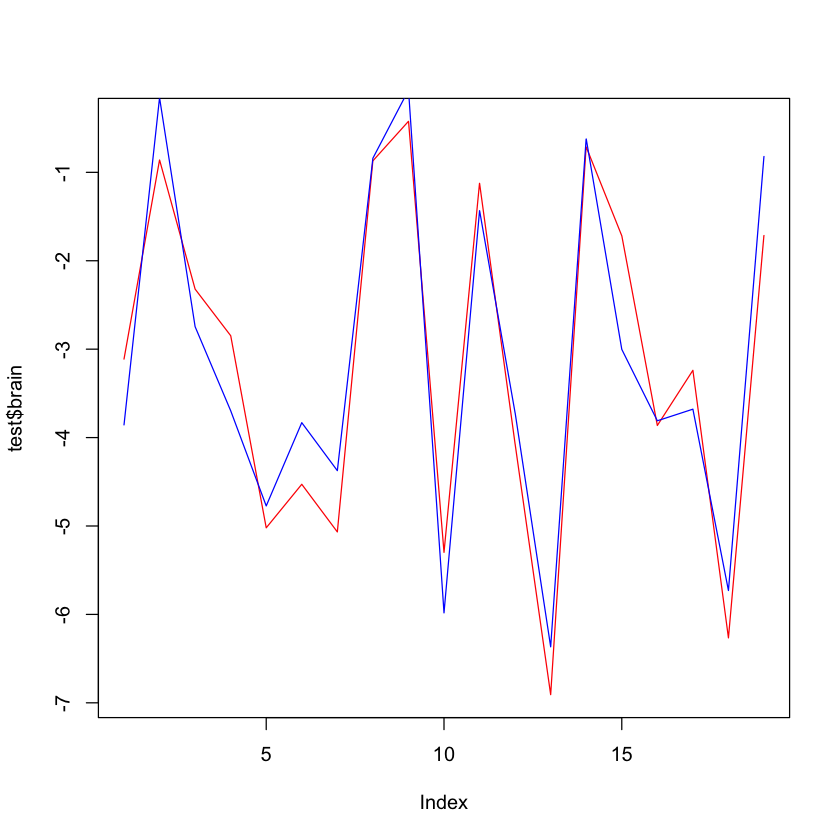

In [39]:
plot(test$brain,type="l",col="red")
lines(predict(model, test[1]), col="blue")

We see that, in principle, the trend is similar. The model did well.